<a href="https://colab.research.google.com/github/sethulekshmips/Coupon-recommandation-system/blob/main/coupon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NumPy** is a powerful library for numerical computing in Python
**Pandas** is a data manipulation and analysis library
**Matplotlib** is a widely used plotting library in Python
**Patch and Line2D** are specific modules within Matplotlib that are used for creating patches (e.g., rectangles, circles) and lines
Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics
style="ticks" sets the aesthetic style of the plots to include tick marks on both the x and y axes.
color_codes=True enables using color codes in seaborn plots.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

pd.read_csv function from the Pandas library to read data from a CSV file
The data is loaded into a Pandas DataFrame, which is a two-dimensional tabular data structure.

df.shape is used to print the number of rows and columns in the DataFrame loaded from the CSV

In [ ]:
#load data
df = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data

(12684, 26)

Data exploration

, it will print the top rows of the DataFrame to the console. This is useful for quickly inspecting the structure and content of the dataset, checking column names, and getting a sense of the data values

In [ ]:
#load the data to understand the attributes and data types
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


.dtypes: This is an attribute of a Pandas DataFrame that returns a Series with the data type of each column. The index of the Series corresponds to the column names, and the values represent the data types of the respective columns

In [ ]:
#let's look at the data types
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

The .astype('category') part of the code converts the 'temperature' column to a categorical data type.
Categorical data types are useful when working with columns that have a limited and fixed set of unique values. They can save memory and improve performance in certain operations.
In-Place Modification:

The modified column is assigned back to the 'temperature' column in the original DataFrame, overwriting the existing data.

In [ ]:
Y_counts = df.groupby('Y').Y.count()
print('Accepted coupon:',Y_counts[1],round(Y_counts[1]/df.shape[0]*100,3),'%')
print('Rejected coupon:',Y_counts[0],round(Y_counts[0]/df.shape[0]*100,3),'%')
#dataset is partially balanced with acceptance class labels are approx 57% and reject class labels are approx 43%.

Accepted coupon: 7210 56.843 %
Rejected coupon: 5474 43.157 %


In [ ]:
#change temperature into a category as its an ordinal datatype
df['temperature']=df['temperature'].astype('category')

Cleaning the data

.info(): This is a method in Pandas that provides a concise summary of the DataFrame, including information about the data types, non-null values, and memory usage.

In [ ]:
#check for empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

["car"]: This specifies the column named "car" in the DataFrame.

.value_counts(): This is a method in Pandas that, when applied to a Series (like a DataFrame column), counts the occurrences of each unique value and returns a new Series where the unique values are the index and the counts are the values

In [ ]:
df["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

'car': This is the label of the column that you want to drop.

.drop(): This is a method in Pandas for removing specified rows or columns.

inplace=True: This parameter, when set to True, modifies the DataFrame in place. If set to False (the default), it returns a new DataFrame with the specified column dropped.

axis=1: This parameter specifies that the operation is performed along columns (i.e., it drops a column). If axis is not specified or set to 0, it would operate along rows.

In [ ]:
df.drop('car', inplace=True, axis=1)

for x in df.columns[df.isna().any()]:: This part of the code iterates over the columns of the DataFrame (df) for which there are missing values. It uses df.columns[df.isna().any()] to get the column names with at least one missing value.

df[x].value_counts().idxmax(): For each column with missing values (x), it calculates the value counts of each unique value in that column and then uses .idxmax() to get the value with the highest count (the most frequent value).

df = df.fillna({x: df[x].value_counts().idxmax()}): It fills the missing values in the column x with the most frequent value for that column. The fillna method is used to replace NaN values, and it takes a dictionary specifying which values to use for filling NaN values for each column.

In [ ]:
for x in df.columns[df.isna().any()]:
    df = df.fillna({x: df[x].value_counts().idxmax()})

for col in df_obj.columns:: This iterates over the columns of the DataFrame (df_obj) that were identified as object types.

df[col].astype('category'): This converts the values in the selected column (col) to the categorical data type.

In [ ]:
#change Object datatypes to Categorical datatypes)

df_obj = df.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    df[col]=df[col].astype('category')

df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object



describe(): This is a Pandas DataFrame method used for generating various summary statistics, such as the mean, standard deviation, minimum, maximum, and quartiles, for numeric columns.

include='all': This parameter specifies that the summary statistics should be computed for both numeric and object-type (categorical) columns. By default, if you don't specify include='all', the method will only consider numeric columns.

In [ ]:
#lets do some statistcal analysis
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


df.select_dtypes('int64'):  It returns a DataFrame containing only the columns with 'int64' data type.

.nunique(): This is a Pandas DataFrame method that returns the number of unique values for each column.

In [ ]:
df.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

After executing this code, the DataFrame df will no longer contain the column named 'toCoupon_GEQ5min'.

If you don't use inplace=True, the drop() method will return a new DataFrame with the specified column removed, and the original DataFrame (df in this case) will remain unchanged.



In [ ]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

 for visualizing the distribution of categorical variables in the DataFrame, especially when there are multiple categorical columns to be displayed

 fig, axes = plt.subplots(9, 2, figsize=(20, 50)): This line creates a 9x2 grid of subplots using Matplotlib, and the overall size of the entire figure is set to (20, 50).

axes = axes.flatten(): This flattens the 2D array of subplots into a 1D array.

The loop for ax, col in zip(axes, df.select_dtypes('category').columns): iterates over the subplots and categorical columns in the DataFrame.

ax is the current subplot.
col is the name of the categorical column.
sns.countplot(y=col, data=df, ax=ax, palette="ch:.25", order=df[col].value_counts().index): This line creates a count plot for the current categorical column. It uses Seaborn's countplot function with the following parameters:

y=col: The categorical column to be plotted on the y-axis.
data=df: The DataFrame containing the data.
ax=ax: The current subplot.
palette="ch:.25": The color palette used for the plot.
order=df[col].value_counts().index: The order of the bars based on the count of each category.
plt.tight_layout(): This adjusts the layout of the subplots to prevent overlap.

plt.show(): This displays the final figure with count plots.

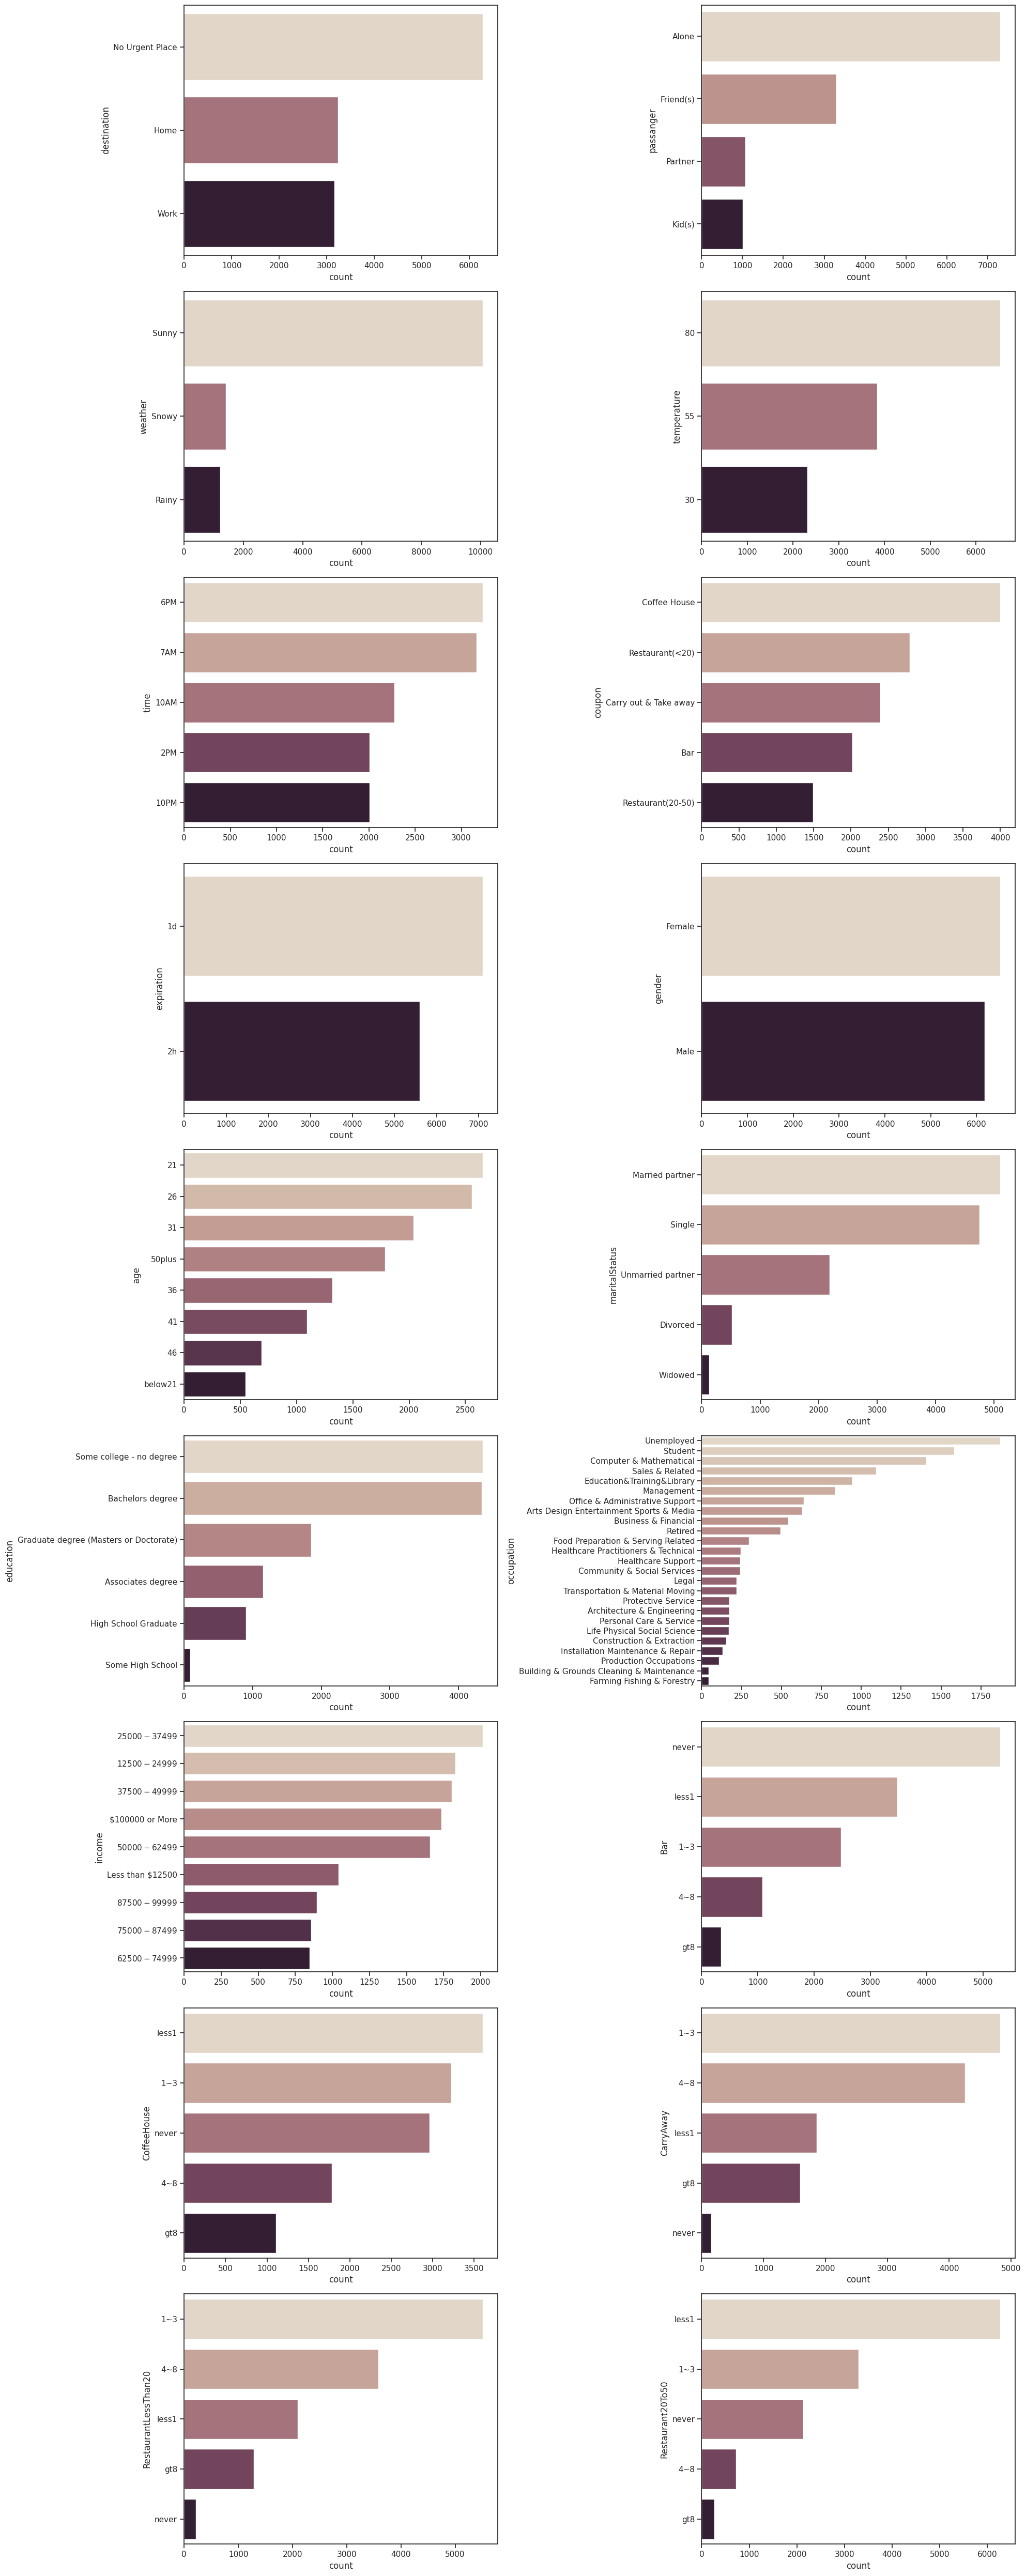

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('category').columns):
    sns.countplot(y=col, data=df, ax=ax,
                  palette="ch:.25", order=df[col].value_counts().index);

plt.tight_layout()
plt.show()

enc = OneHotEncoder(dtype='int64'): Initializes a OneHotEncoder with the data type set to 'int64'.

df_cat = df.select_dtypes(include=['category']).copy(): Selects columns of data type 'category' from the original DataFrame.

df_int = df.select_dtypes(include=['int64']).copy(): Selects columns of data type 'int64' from the original DataFrame.

df_enc = pd.DataFrame(): Initializes an empty DataFrame to store the one-hot encoded features.

The loop for col in df_cat.columns: iterates over each categorical column in df_cat.

enc_results = enc.fit_transform(df_cat[[col]]): Fits and transforms the current categorical column using the OneHotEncoder.

df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_): Creates a DataFrame from the one-hot encoded results, with column names derived from the categories.

df_enc = pd.concat([df_enc, df0], axis=1): Concatenates the one-hot encoded DataFrame (df0) with the overall encoded DataFrame (df_enc).

df_final = pd.concat([df_enc, df_int], axis=1): Concatenates the one-hot encoded DataFrame (df_enc) with the original integer columns (df_int) to create the final DataFrame with one-hot encoded features.

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

enc = OneHotEncoder(dtype='int64')

df_cat = df.select_dtypes(include=['category']).copy()
df_int = df.select_dtypes(include=['int64']).copy()

df_enc = pd.DataFrame()
for col in df_cat.columns:
    enc_results = enc.fit_transform(df_cat[[col]])
    df0 = pd.DataFrame(enc_results.toarray(), columns=enc.categories_)
    df_enc = pd.concat([df_enc,df0], axis=1)

df_final = pd.concat([df_enc, df_int], axis=1)

#source: https://pbpython.com/categorical-encoding.html

In [ ]:
df_final

,"(Home,)","(No Urgent Place,)","(Work,)","(Alone,)","(Friend(s),)","(Kid(s),)","(Partner,)","(Rainy,)","(Snowy,)","(Sunny,)",...,"(gt8,)","(less1,)","(never,)",has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
12680,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
12681,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
12682,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,1,1,0,1,0


In [ ]:
#df_final.index

Data Modeling

These classifiers can be used for different types of machine learning tasks, such as classification. They are part of scikit-learn's comprehensive set of tools for machine learning

In [ ]:
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

test_size=.3: The proportion of the dataset to include in the test split. In this case, it's set to 30%, so 70% will be used for training.
random_state=42: This parameter ensures reproducibility. If you use the same random state, you'll get the same split each time you run the code.
shuffle=True: This parameter shuffles the data before splitting. It's set to True by default, ensuring that the data is randomly ordered before splitting.
stratify=df_final['Y']: This parameter ensures that the target variable 'Y' is proportionally represented in both the training and testing sets. This is especially useful for imbalanced datasets where you want to maintain the class distribution.

In [ ]:
#split data into training and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final, test_size=.3, random_state=42, shuffle=True, stratify=df_final['Y'])

The iloc[:, :-1] indexing means selecting all rows (:) and all columns except the last one ([:-1]).

 The iloc[:, -1] indexing means selecting all rows (:) and .only the last column ([-1]).

In [ ]:
#Creating the Dependent Feature Matrix
X_train = train_set.iloc[:, :-1].values
X_test = test_set.iloc[:, :-1].values

#Creating the Independent Vector
y_train = train_set.iloc[:, -1].values
y_test = test_set.iloc[:, -1].values

Logistic regression

popular algorithm for binary and multiclass classification.

random_state: This parameter ensures reproducibility by fixing the random seed. If you run the code multiple times with the same random_state, you should get the same results.

solver: This parameter specifies the algorithm to use in the optimization problem. 'lbfgs' is one of the optimization algorithms available in scikit-learn.inorder to reduce error in predict

multi_class: This parameter specifies the strategy for handling multiple classes. 'ovr' stands for "one-vs-rest," where a binary classification problem is created for each class.

fit(X_train, y_train): This method trains the logistic regression model on the training data.

In [ ]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

#Predict the response for test dataset
y_pred_LR = LR.predict(X_test)
#evaluate the model's performance on the test set.
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59      1643
           1       0.69      0.78      0.74      2163

    accuracy                           0.68      3806
   macro avg       0.67      0.66      0.66      3806
weighted avg       0.68      0.68      0.67      3806



Gaussian naive bayes

In [ ]:
GNB = GaussianNB().fit(X_train, y_train)

#Predict the response for test dataset
y_pred_GNB = GNB.predict(X_test)

print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1643
           1       0.68      0.60      0.64      2163

    accuracy                           0.61      3806
   macro avg       0.61      0.61      0.61      3806
weighted avg       0.62      0.61      0.61      3806



Support vector machines

SVC: This class in scikit-learn stands for Support Vector Classification, and it's used for classification tasks.

kernel="rbf": This parameter specifies the type of kernel used for the decision function. "rbf" stands for Radial basis function, a popular kernel for SVM.

random_state=None: This parameter ensures reproducibility by fixing the random seed. If you set it to a specific value, you will get the same results across different runs.

probability=True: This parameter enables probability estimates. Setting it to True allows the predict_proba method to be used to get probability estimates.

cache_size=500: This parameter specifies the size of the kernel cache. It is used to store the intermediate results of the kernel function, and increasing it can speed up the training process for large datasets.

gamma=0.1: This parameter defines how far the influence of a single training example reaches. A lower value makes the influence more global.

In [ ]:
SVM = SVC(kernel="rbf", random_state=None, probability=True, cache_size=500, gamma=0.1).fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = SVM.predict(X_test)

print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1643
           1       0.76      0.84      0.79      2163

    accuracy                           0.75      3806
   macro avg       0.75      0.74      0.74      3806
weighted avg       0.75      0.75      0.75      3806



SVM has the highest accuracy amongst the other models. I chose to use the RBF kernel as we do not know if the data is linear separable or not.

For machine learning models, achieving a good prediction model is extremely crucial. It involves achieving a balance between underfitting and overfitting or ie. a trade-off between bias and variance.

When it comes to classification, the precision-recall trade-off is a fundamentally important metric to investigate.

Precision is the ratio between the True Positive and all Positives. For this problem it would be the measure of drivers that were correctly identified using a coupon out of all the drivers actually using it.

Recall is the measure of our model correctly identifying True Positives. Thus all the drivers who actually accepted a coupon, recall tells how many we correctly identified as accepting a coupon.

confusion_matrix(y_test, y_pred_SVM): This function computes the confusion matrix to evaluate the accuracy of a classification. It takes the true labels (y_test) and the predicted labels (y_pred_SVM) as input and returns a 2D array containing the counts of true positive, true negative, false positive, and false negative

In [ ]:
from sklearn.metrics import confusion_matrix

cm_SVM = confusion_matrix(y_test,y_pred_SVM)
pd.crosstab(y_test, y_pred_SVM, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,1059,584,1643
1,356,1807,2163
All,1415,2391,3806


def print_confusion_matrix() defines a function that encapsulates the logic for creating and customizing the heatmap of the confusion matrix.

df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names): Converts the confusion matrix and class names into a DataFrame.

fig = plt.figure(figsize=figsize): Creates a figure with the specified size.

sns.heatmap(df_cm, annot=True, fmt="d"): Generates a heatmap using seaborn, with annotations and integer format.

The try-except block is used to catch a ValueError that may occur if the confusion matrix contains non-integer values.

Customization of tick labels for the y-axis and x-axis, setting axis labels, and specifying the truth and prediction class names.

Finally, the function is called with the confusion matrix cm_SVM and class names ["Coupon Not Accepted", "Coupon Accepted"] as an example.

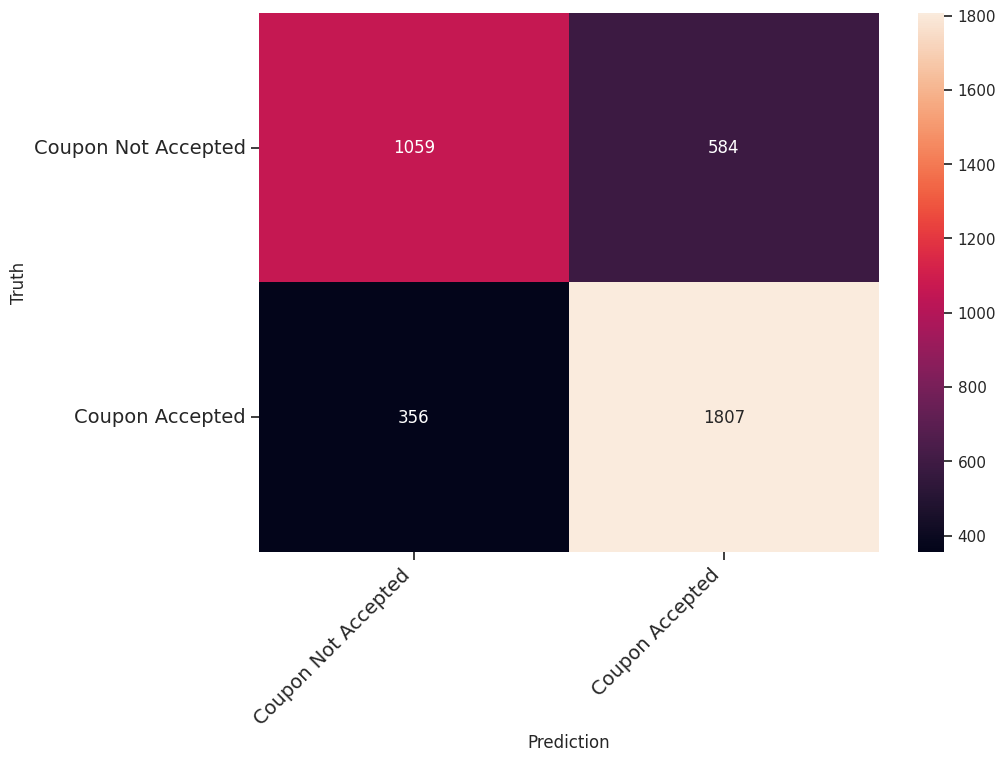

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

print_confusion_matrix(cm_SVM,["Coupon Not Accepted", "Coupon Accepted"])

A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

From our train and test data, we already know that our test data consisted of 3806 data points. That is the 3rd row and 3rd column value at the end. We also notice that there are some actual and predicted values. The actual values are the number of data points that were originally categorized into 0 or 1. The predicted values are the number of data points SVM model predicted as 0 or 1.

The actual values are:

The drivers who actually did not use a coupon = 1643
The drivers who actually did use a coupon = 2163

The predicted values are:
Number of drivers who were predicted as not using a coupon = 1401
Number of drivers who were predicted as using a coupon = 2396
All the values we obtain above have a term. Let’s go over them one by one:

The cases in which the drivers actually did not use a coupon and our model also predicted as not using one is called the True Negatives. For our matrix, True Negatives = 1056.
The cases in which the drivers actually used a coupon and our model also predicted as using one are called the True Positives. For our matrix, True Positives = 1809
However, there are are some cases where the drivers actually did not use a coupon, but our model has predicted that they did use one. This kind of error is the Type I Error and we call the values as False Positives. For our matrix, False Positives = 587
Similarly, there are are some cases where the drivers actually used a coupon, but our model has predicted that they did not use one. This kind of error is the Type II Error and we call the values as False Negatives. For our matrix, False Negatives = 354

ROC CURVES

y_pred_proba = SVM.predict_proba(X_test)[:, 1]: Retrieves the predicted probabilities of the positive class (class 1) from the SVM model for the test set.

roc_auc = metrics.roc_auc_score(y_test, y_pred_proba): Computes the ROC-AUC score using the true labels (y_test) and predicted probabilities.

The main plotting section involves creating an ROC curve:

plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill'): Plots the diagonal line representing the ROC curve for random predictions (no skill).
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba): Computes the ROC curve using the true labels and predicted probabilities.
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc)): Plots the ROC curve for the model.
plt.xlabel('False Positive Rate') and plt.ylabel('True Positive Rate'): Sets axis labels.
plt.title('Receiver Operating Characteristic Curve'): Sets the plot title.
plt.legend(loc=4): Displays the legend in the lower-right corner.
plt.show(): Shows the plot.
This visual representation helps assess the trade-off between sensitivity (true positive rate) and specificity (true negative rate) across different probability thresholds. The AUC value quantifies the overall performance of the model, with a higher AUC indicating better discrimination ability.

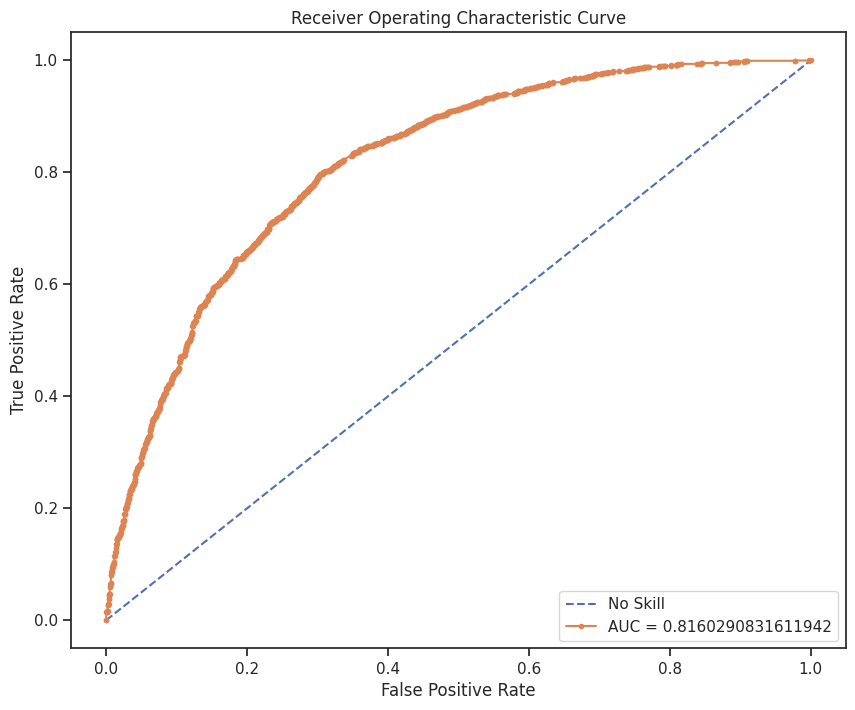

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_pred_proba = SVM.predict_proba(X_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(f'Receiver Operating Characteristic AUC = {roc_auc}')

plt.figure(figsize = (10,8))
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, thresholds_ = roc_curve(y_test, y_pred_proba)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='AUC = '+str(roc_auc))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
# show the legend
plt.legend(loc=4)
# show the plot
plt.show()

pRECISION RECALL CURVE

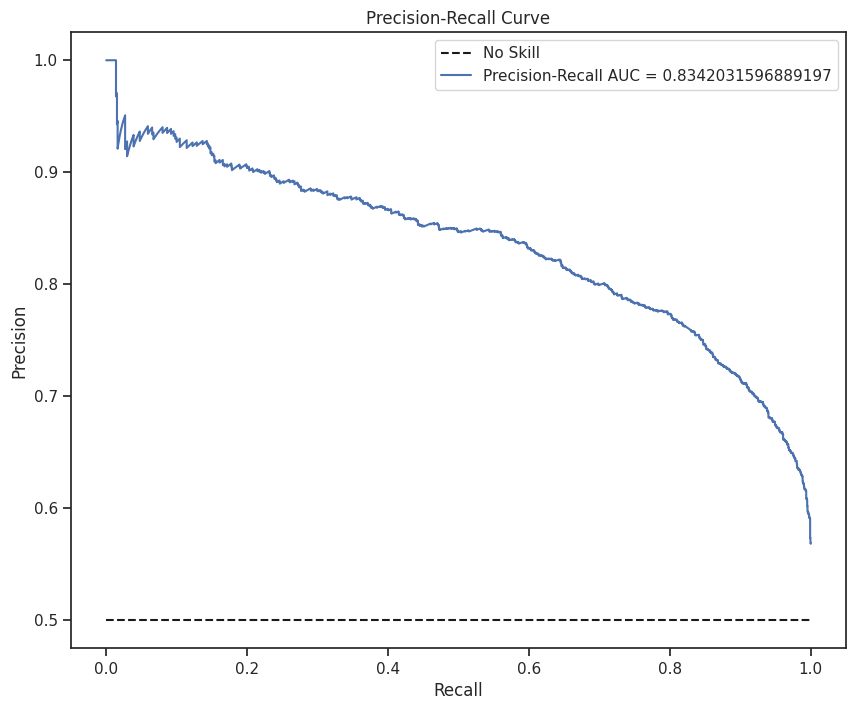

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--', label = 'No Skill')
prc_auc = auc(recall, precision)
plt.plot(recall, precision, label = 'Precision-Recall AUC = '+str(prc_auc))
plt.legend(loc=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

At the lowest point (0,0), the threshold is set to 1 which means the model make no distinctions between drivers who use coupons and drivers who do not use coupons.
The highest point (1,1), the threshold is set at 0 which means that both precision and recall are high and the model makes distinctions perfectly.
The rest of the curve is the values of Precision and Recall for the threshold values between 0 and 1. Our aim is to make the curve as close to (1, 1) as possible- meaning a good precision and recall.
Similar to ROC, the area with the curve and the axes as the boundaries is the Area Under Curve(AUC). Consider this area as a metric of a good model. The AUC ranges from 0 to 1.Therefore, we should aim for a high value of AUC.

In [ ]:
import pickle
with open('your_model.pkl', 'wb') as file:
    pickle.dump(SVM, file)